# **Importing modules**

In [2]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# **Data cleaning**

In [3]:
df = pd.read_csv('/content/ifood_df.csv')
df.head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
0,58138.0,0,0,58,635,88,546,172,88,88,...,0,0,0,0,1,0,0,1529,1441,0
1,46344.0,1,1,38,11,1,6,2,1,6,...,0,0,0,0,1,0,0,21,15,0
2,71613.0,0,0,26,426,49,127,111,21,42,...,1,0,0,0,1,0,0,734,692,0
3,26646.0,1,0,26,11,4,20,10,3,5,...,1,0,0,0,1,0,0,48,43,0
4,58293.0,1,0,94,173,43,118,46,27,15,...,0,0,0,0,0,0,1,407,392,0


In [4]:
df.shape

(2205, 39)

In [5]:
df.duplicated().sum()

184

In [6]:
df[df.duplicated()].head()

,Income,Kidhome,Teenhome,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,...,marital_Together,marital_Widow,education_2n Cycle,education_Basic,education_Graduation,education_Master,education_PhD,MntTotal,MntRegularProds,AcceptedCmpOverall
77,38620.0,0,0,56,112,17,44,34,22,89,...,1,0,0,0,0,1,0,229,140,0
167,78497.0,0,0,44,207,26,447,75,0,223,...,0,0,1,0,0,0,0,755,532,1
267,51369.0,0,1,84,297,7,79,0,11,182,...,1,0,0,0,1,0,0,394,212,0
268,37760.0,0,0,20,84,5,38,150,12,28,...,1,0,0,0,1,0,0,289,261,0
346,37717.0,1,0,31,9,0,6,4,1,5,...,0,0,0,0,0,0,1,20,15,0


 Decide to leave the duplicate, since the value is different from each other

In [7]:
df.isnull().sum().sum()

0

There is no missing value, we all save here

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 39 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Income                2205 non-null   float64
 1   Kidhome               2205 non-null   int64  
 2   Teenhome              2205 non-null   int64  
 3   Recency               2205 non-null   int64  
 4   MntWines              2205 non-null   int64  
 5   MntFruits             2205 non-null   int64  
 6   MntMeatProducts       2205 non-null   int64  
 7   MntFishProducts       2205 non-null   int64  
 8   MntSweetProducts      2205 non-null   int64  
 9   MntGoldProds          2205 non-null   int64  
 10  NumDealsPurchases     2205 non-null   int64  
 11  NumWebPurchases       2205 non-null   int64  
 12  NumCatalogPurchases   2205 non-null   int64  
 13  NumStorePurchases     2205 non-null   int64  
 14  NumWebVisitsMonth     2205 non-null   int64  
 15  AcceptedCmp3         


Some Group features


In [10]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'marital_Divorced', 'marital_Married',
       'marital_Single', 'marital_Together', 'marital_Widow',
       'education_2n Cycle', 'education_Basic', 'education_Graduation',
       'education_Master', 'education_PhD', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall'],
      dtype='object')

## Martial Status

In [11]:
df['marital_Single'].replace(1,2, inplace=True)
df['marital_Together'].replace(1,3, inplace=True)
df['marital_Widow'].replace(1,4, inplace=True)
df['marital_Divorced'].replace(1,5, inplace=True)

In [12]:
df['marital_Status'] = df['marital_Married']+df['marital_Single']+df['marital_Together']+df['marital_Divorced']+df['marital_Widow']
df['marital_Status'] = df['marital_Status'].map({1:'married',2:'single',3:'together',4:'widow',5:'divorced'})

In [13]:
df.drop(['marital_Married','marital_Single','marital_Divorced','marital_Together','marital_Widow'], axis=1, inplace=True)
df['marital_Status'].unique()

array(['single', 'together', 'married', 'divorced', 'widow'], dtype=object)

# Education status

In [14]:
df['education_Basic'].replace(1,2, inplace=True)
df['education_Graduation'].replace(1,3, inplace=True)
df['education_Master'].replace(1,4, inplace=True)
df['education_PhD'].replace(1,5, inplace=True)

In [15]:
df['education_Status'] = df['education_2n Cycle']+df['education_Basic']+df['education_Graduation']+df['education_Master']+df['education_PhD']
df['education_Status'] = df['education_Status'].map({1:'2n cycle',2:'basic', 3:'graduation', 4:'master', 5:'phd'})

In [16]:
df.drop(['education_2n Cycle', 'education_Basic', 'education_Graduation', 'education_Master', 'education_PhD'], axis=1, inplace=True)
df['education_Status'].unique()

array(['graduation', 'phd', 'master', 'basic', '2n cycle'], dtype=object)

In [17]:
df.columns

Index(['Income', 'Kidhome', 'Teenhome', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status'],
      dtype='object')

## Total children

In [18]:
df['total_kid'] = df['Kidhome'] + df['Teenhome']
df.drop(['Kidhome','Teenhome'],axis=1,inplace=True)

# **Clustering**
# RFM
RFM segmentation is widely used. Eventho it seems simple, but RFM is powerfull. Go-jek, decacorn starut from Indonesia use RFM segmentation to segmenting their customer, and many more company use RFM segmentation.

RFM analysis is a customer segmentation technique that evaluates customer behavior based on three key dimensions: Recency, Frequency, and Monetary value. By assigning scores or rankings to customers based on these dimensions, businesses can identify different customer segments and tailor their marketing strategies accordingly. RFM analysis helps businesses understand customer engagement, loyalty, and financial contributions, enabling them to target high-value customers, optimize marketing efforts, and improve customer retention.

**Recency** showing how recent a customer's last purchase was. For RFM analysis, the format of Recency is in integer of days. It can be obtained by substracting the last transaction by the day of analysis, or the day of the data being fetched.

**Frequency** is the total number of purchase for each customers, so I all the purchase channel will be combined in this case



In [19]:
df['Frequency'] = df['NumWebPurchases']+df['NumCatalogPurchases']+df['NumStorePurchases']

 **Monetary** is simply the total spending of each customer.

because this data has already provide recency and monetary, we can just that features

**EDA**

In [20]:
df.head()

,Income,Recency,MntWines,MntFruits,MntMeatProducts,MntFishProducts,MntSweetProducts,MntGoldProds,NumDealsPurchases,NumWebPurchases,...,Response,Age,Customer_Days,MntTotal,MntRegularProds,AcceptedCmpOverall,marital_Status,education_Status,total_kid,Frequency
0,58138.0,58,635,88,546,172,88,88,3,8,...,1,63,2822,1529,1441,0,single,graduation,0,22
1,46344.0,38,11,1,6,2,1,6,2,1,...,0,66,2272,21,15,0,single,graduation,2,4
2,71613.0,26,426,49,127,111,21,42,1,8,...,0,55,2471,734,692,0,together,graduation,0,20
3,26646.0,26,11,4,20,10,3,5,2,2,...,0,36,2298,48,43,0,together,graduation,1,6
4,58293.0,94,173,43,118,46,27,15,5,5,...,0,39,2320,407,392,0,married,phd,1,14


Text(0.5, 1.0, 'Recency')

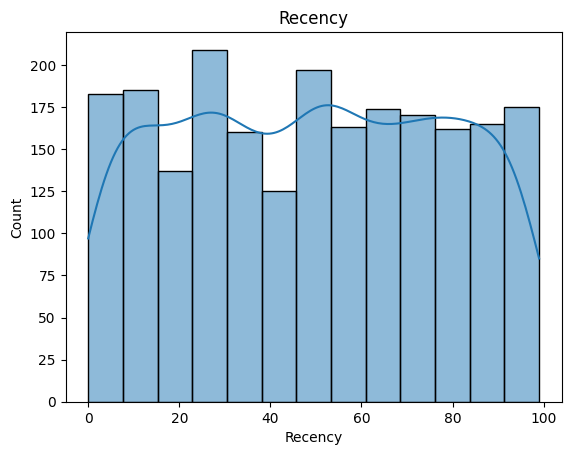

In [21]:
sns.histplot(df['Recency'], kde=True)
plt.title('Recency')

The distribution of the recency of the customer is closed to uniform distribution. Means that the distribution is fairly spread from the customers that just doing transaction to customers that do the transaction almost 100 days ago

Text(0.5, 1.0, 'Frequency')

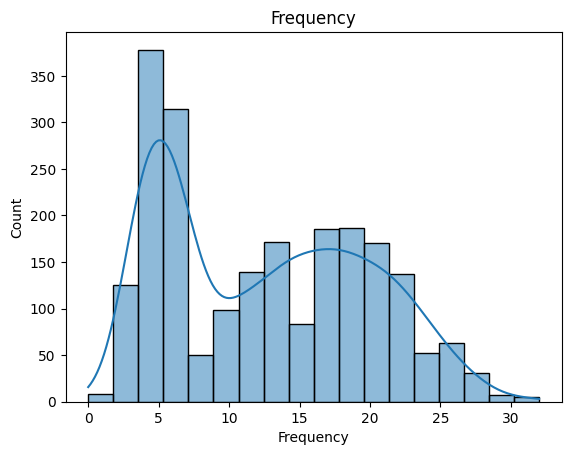

In [22]:
sns.histplot(df['Frequency'], kde=True)
plt.title('Frequency')

The frequency transaction of each customer is between 1 transaction up to around 30 transactions. With most of them doing around five transaction followed by 17-18 transactions for each customers

Text(0.5, 1.0, 'Monetary')

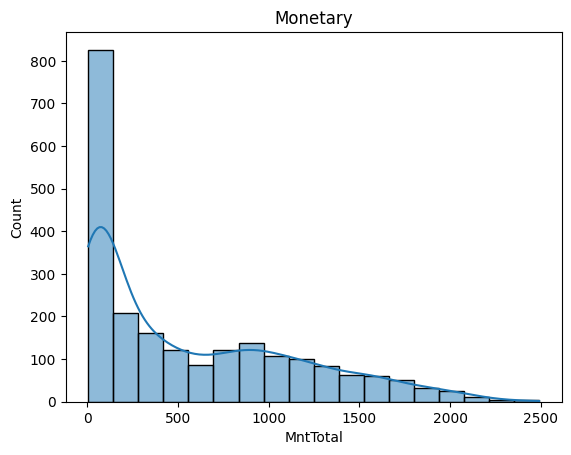

In [23]:
sns.histplot(df['MntTotal'], kde=True)
plt.title('Monetary')

Most of the customers spend less than $500 based on the given histogram.

#**Clustering**
There are some method to do the RFM clustering such as quartile, pareto, and other methods. In this project, the quartile methods will be used.

The quartile method basically cut the data into 4 quartile and give them the ordinal label based on its quartile.

In [24]:
RQ = pd.qcut(df['Recency'], q=4, labels=[4,3,2,1]) # the lowest the recency the better
MQ = pd.qcut(df['MntTotal'], q=4, labels=[1,2,3,4])
FQ = pd.qcut(df['Frequency'], q=4, labels=[1,2,3,4])

In [25]:
df = df.assign(RQ=RQ.values,FQ=FQ.values,MQ=MQ.values)

the rfm score will look like this

In [26]:
df[['Recency','RQ','Frequency','FQ','MntTotal','MQ']].head()

,Recency,RQ,Frequency,FQ,MntTotal,MQ
0,58,2,22,4,1529,4
1,38,3,4,1,21,1
2,26,3,20,4,734,3
3,26,3,6,1,48,1
4,94,1,14,3,407,3


Then we can sum the R,F,and M score to get overall score

In [27]:
df['RFMQ'] = df[['RQ','FQ','MQ']].sum(axis=1)

In [28]:
df['RFMQ'].head()

0    10
1     5
2    10
3     5
4     7
Name: RFMQ, dtype: int64

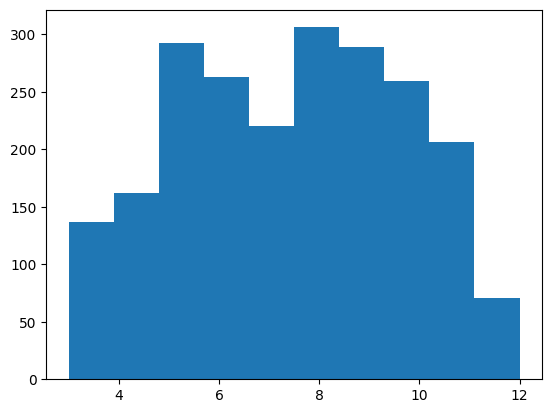

In [29]:
plt.hist(df['RFMQ']);

Based on the histogram, we can cluster the customers into four group, with the rule :



*  score <= 3 is not loyal (1)
* 4 <= score <= 6 is fair customer (2)
*  7 <= score <= 9 is good customer (3)
*  score > 10 is best customer (4)








In [30]:
df['RFMQ']

0       10
1        5
2       10
3        5
4        7
        ..
2200    10
2201     8
2202     8
2203    11
2204     7
Name: RFMQ, Length: 2205, dtype: int64

In [31]:
df['cluster_rfm'] = pd.qcut(df['RFMQ'], q=4, labels=[0,1,2,3])

In [32]:
import plotly.graph_objects as go
import plotly.express as px

rfm_cluster = df[['Recency','Frequency','MntTotal','cluster_rfm']]
# Create the scatter plot
fig = px.scatter_3d(rfm_cluster, x='Recency', y='Frequency', z='MntTotal', color=rfm_cluster['cluster_rfm'],
                   labels={'0':'Recency','1':'Frequency','2':'Monetary'})

# Show the figure
fig.show()


# customer profiling






Distribution of cluster

<Axes: >

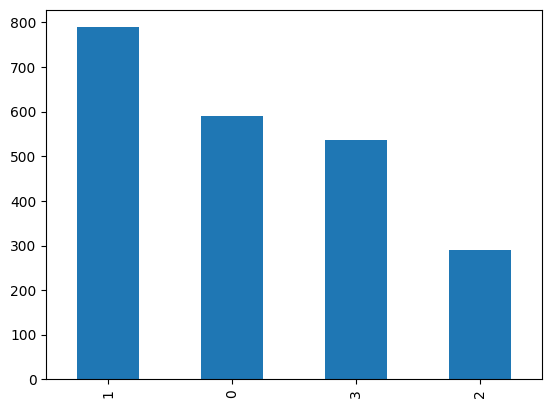

In [33]:
df['cluster_rfm'].value_counts().plot.bar()

Most of the customer are on cluster 2

<Axes: xlabel='Age', ylabel='Density'>

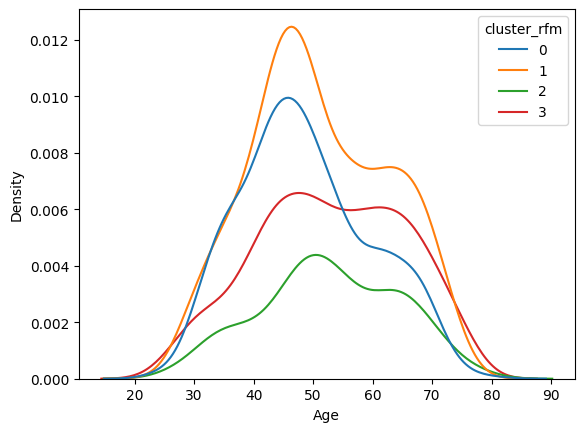

In [34]:
sns.kdeplot(data=df, x='Age', hue='cluster_rfm')

<Axes: xlabel='MntTotal', ylabel='Income'>

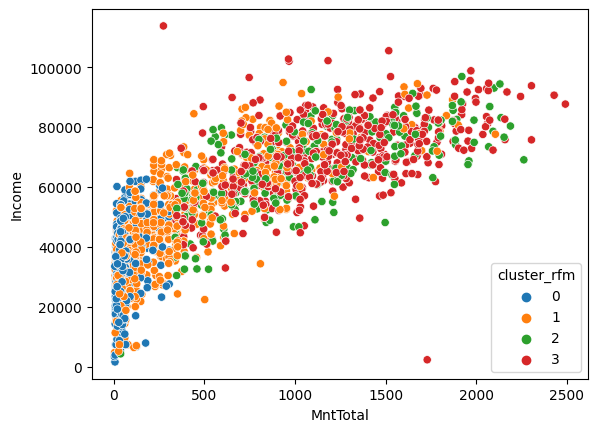

In [35]:
sns.scatterplot(data=df, x='MntTotal', y='Income', hue='cluster_rfm')

Cluster 1 mostly low spender with low to mid income. Cluster 2 spread fairly through all income level and spending amounth. While cluster 3 and 4 tend to spend higher and have higher income.

<Axes: xlabel='cluster_rfm', ylabel='count'>

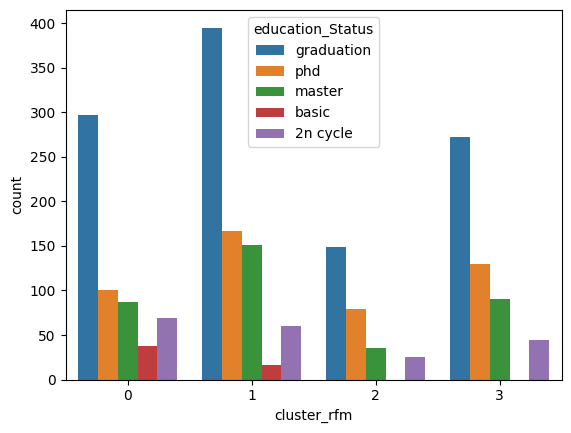

In [36]:
sns.countplot(data=df, x='cluster_rfm', hue='education_Status')

In cluster 3 and 4, there is no basic education status.

<Axes: xlabel='cluster_rfm', ylabel='count'>

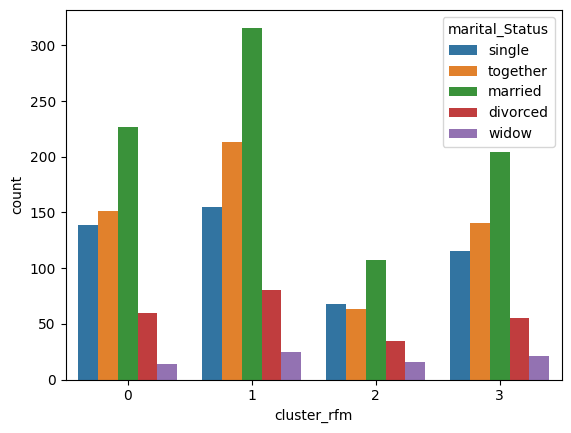

In [37]:
sns.countplot(data=df, x='cluster_rfm', hue='marital_Status')

<Axes: xlabel='cluster_rfm', ylabel='count'>

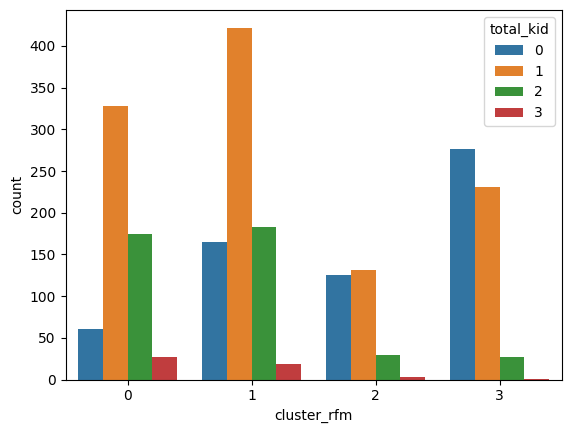

In [38]:
sns.countplot(df, x='cluster_rfm', hue='total_kid')

# **k means clustering**





In this ML clustering, we will reduce the dimensionality of the data using PCA

In [39]:
df.columns

Index(['Income', 'Recency', 'MntWines', 'MntFruits', 'MntMeatProducts',
       'MntFishProducts', 'MntSweetProducts', 'MntGoldProds',
       'NumDealsPurchases', 'NumWebPurchases', 'NumCatalogPurchases',
       'NumStorePurchases', 'NumWebVisitsMonth', 'AcceptedCmp3',
       'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1', 'AcceptedCmp2',
       'Complain', 'Z_CostContact', 'Z_Revenue', 'Response', 'Age',
       'Customer_Days', 'MntTotal', 'MntRegularProds', 'AcceptedCmpOverall',
       'marital_Status', 'education_Status', 'total_kid', 'Frequency', 'RQ',
       'FQ', 'MQ', 'RFMQ', 'cluster_rfm'],
      dtype='object')



1.   select the features to use
2.   Turn all data into numerical
3.   standardization
4.   apply PCA




In [40]:
df_pca = df[['Income', 'Recency', 'MntWines', 'MntFruits',
       'MntMeatProducts', 'MntFishProducts', 'MntSweetProducts',
       'MntGoldProds', 'NumDealsPurchases', 'NumWebPurchases',
       'NumCatalogPurchases', 'NumStorePurchases', 'NumWebVisitsMonth',
       'AcceptedCmp3', 'AcceptedCmp4', 'AcceptedCmp5', 'AcceptedCmp1',
       'AcceptedCmp2', 'Complain', 'Z_CostContact', 'Z_Revenue', 'Response',
       'Age', 'Customer_Days', 'MntTotal', 'MntRegularProds',
       'AcceptedCmpOverall', 'marital_Status', 'education_Status', 'Frequency',
       'total_kid']]

In [41]:
df_pca.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2205 entries, 0 to 2204
Data columns (total 31 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Income               2205 non-null   float64
 1   Recency              2205 non-null   int64  
 2   MntWines             2205 non-null   int64  
 3   MntFruits            2205 non-null   int64  
 4   MntMeatProducts      2205 non-null   int64  
 5   MntFishProducts      2205 non-null   int64  
 6   MntSweetProducts     2205 non-null   int64  
 7   MntGoldProds         2205 non-null   int64  
 8   NumDealsPurchases    2205 non-null   int64  
 9   NumWebPurchases      2205 non-null   int64  
 10  NumCatalogPurchases  2205 non-null   int64  
 11  NumStorePurchases    2205 non-null   int64  
 12  NumWebVisitsMonth    2205 non-null   int64  
 13  AcceptedCmp3         2205 non-null   int64  
 14  AcceptedCmp4         2205 non-null   int64  
 15  AcceptedCmp5         2205 non-null   i

In [42]:
def ohe_cols(df):
    object_columns = df.select_dtypes(include=['object']).columns

    df_encoded = pd.get_dummies(df, columns=object_columns)

    return df_encoded

In [43]:
df_pca = ohe_cols(df_pca)

Before we do the segmentation, we wanna make sure that the features is in the same scale

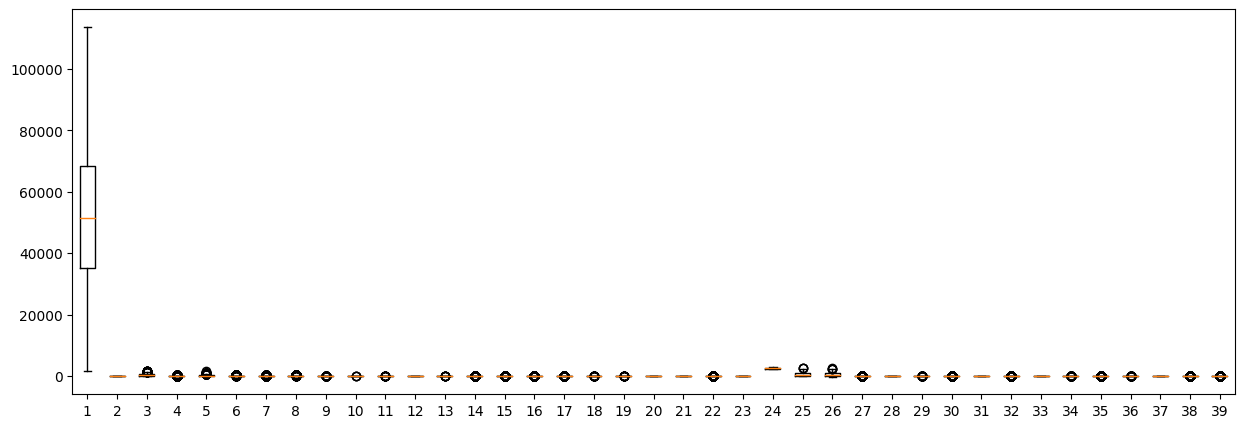

In [44]:
plt.figure(figsize=(15,5))
plt.boxplot(df_pca);

The scale between R,F,M seems different. Because M assign for monetary. So, we do normalization using z normalization

In [45]:
# normalization > z-normalization
from sklearn.preprocessing import StandardScaler

In [46]:
scaler = StandardScaler()

In [47]:
df_pca_norm = scaler.fit_transform(df_pca)
df_pca_norm = pd.DataFrame(df_pca_norm)
df_pca_norm

,0,1,2,3,4,5,6,7,8,9,...,29,30,31,32,33,34,35,36,37,38
0,0.314651,0.310830,0.974566,1.548614,1.748400,2.449154,1.480301,0.849556,0.361479,1.424772,...,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
1,-0.254877,-0.380600,-0.874776,-0.638664,-0.731678,-0.652345,-0.635399,-0.735767,-0.168834,-1.132957,...,-0.341256,-0.795062,1.903324,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2,0.965354,-0.795458,0.355155,0.568110,-0.175957,1.336263,-0.149031,-0.039771,-0.699147,1.424772,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
3,-1.206087,-0.795458,-0.874776,-0.563241,-0.667380,-0.506392,-0.586763,-0.755100,-0.168834,-0.767567,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
4,0.322136,1.555404,-0.394659,0.417263,-0.217292,0.150396,-0.003121,-0.561768,1.422105,0.328602,...,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2200,0.463624,-0.104028,1.193879,0.417263,0.076644,0.077420,2.209853,3.923536,-0.168834,1.790162,...,-0.341256,1.257763,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2201,0.598401,0.241687,0.295881,-0.663806,-0.621452,-0.688833,-0.659718,-0.697100,2.482731,1.424772,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,-1.009570,-0.444656,1.905873
2202,0.258780,1.451690,1.783653,0.542969,0.237389,-0.105022,-0.367897,-0.387769,-0.699147,-0.767567,...,2.930351,-0.795062,-0.525397,-0.589047,-0.188938,-0.314093,-0.158444,0.990521,-0.444656,-0.524694
2203,0.851004,-1.417746,0.361082,0.090428,0.223611,0.770696,0.069834,0.327560,-0.168834,0.693992,...,-0.341256,-0.795062,-0.525397,1.697658,-0.188938,-0.314093,-0.158444,-1.009570,2.248931,-0.524694


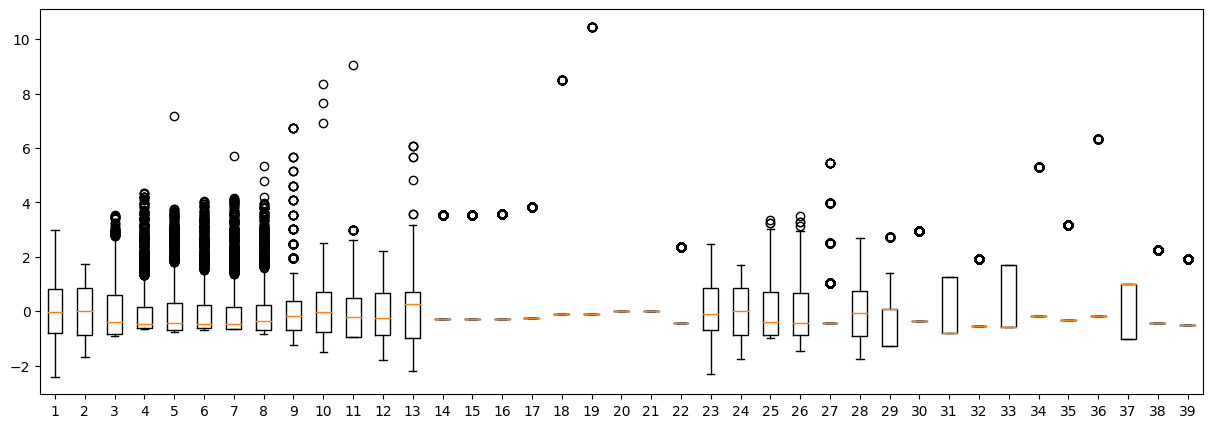

In [48]:
plt.figure(figsize=(15,5))
plt.boxplot(df_pca_norm);







PCA

In [49]:

from sklearn.decomposition import PCA

In [50]:
pca = PCA(n_components=3)
df_pca = pca.fit_transform(df_pca_norm)

In [51]:
df_pca = pd.DataFrame(df_pca)

In [52]:
df_pca.head()

,0,1,2
0,4.622217,-1.447534,0.230620
1,-3.015862,0.019910,-0.970738
2,1.825422,-1.651428,-0.177912
3,-2.942265,-0.042211,-1.240746
4,-0.386800,-0.658150,0.822531


K means clustering

In [53]:
from sklearn.cluster import KMeans

In [54]:
from sklearn.metrics import silhouette_score

def find_optimal_k_elbow(data, max_clusters=10):
    inertias = []
    for k in range(1, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=2023)
        kmeans.fit(data)
        inertias.append(kmeans.inertia_)

    # Plot the elbow curve
    plt.plot(range(1, max_clusters + 1), inertias, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Inertia (Within-cluster Sum of Squares)')
    plt.title('Elbow Method')
    plt.show()

# Silhouette Analysis to find the optimal number of clusters
def find_optimal_k_silhouette(data, max_clusters=10):
    silhouette_scores = []
    for k in range(2, max_clusters + 1):
        kmeans = KMeans(n_clusters=k, n_init=10, random_state=2023)
        labels = kmeans.fit_predict(data)
        silhouette_scores.append(silhouette_score(data, labels))

    # Plot the silhouette scores
    plt.plot(range(2, max_clusters + 1), silhouette_scores, marker='o')
    plt.xlabel('Number of Clusters (k)')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Analysis')
    plt.show()

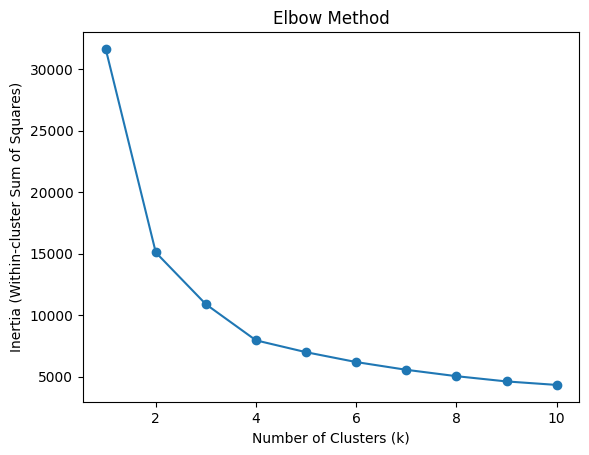

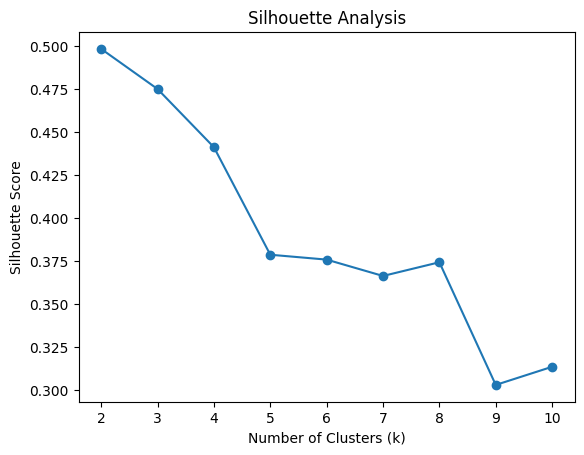

In [55]:
find_optimal_k_elbow(df_pca)
find_optimal_k_silhouette(df_pca)


We choose 4 cluster as the best cluster to our dataset



In [56]:
kmeans = KMeans(n_clusters = 4, n_init=10)
kmeans.fit(df_pca)

KMeans(n_clusters=4, n_init=10)

In [57]:
kmeans.cluster_centers_

array([[ 0.28379323, -0.21855708,  1.67934017],
       [ 3.44064439, -1.37564543, -0.5314773 ],
       [-2.72123548,  0.266877  , -0.50731174],
       [ 5.81618114,  3.77442453, -0.66833039]])

In [58]:
df_pca['cluster'] = kmeans.labels_

In [59]:
df_pca

,0,1,2,cluster
0,4.622217,-1.447534,0.230620,1
1,-3.015862,0.019910,-0.970738,2
2,1.825422,-1.651428,-0.177912,1
3,-2.942265,-0.042211,-1.240746,2
4,-0.386800,-0.658150,0.822531,0
...,...,...,...,...
2200,2.366869,-1.758811,0.573416,1
2201,-0.408872,1.810219,3.326631,0
2202,2.436108,1.024319,-0.126522,1
2203,1.806648,-1.358340,0.775734,1


In [60]:
import plotly.graph_objects as go
import plotly.express as px
import numpy as np

# Create the scatter plot
fig = px.scatter_3d(df_pca, x=0, y=1, z=2, color=df_pca['cluster'],
                   labels={'0':'0','1':'1','2':'2'})

# Show the figure
fig.show()


In [61]:
# assign the cluster into original dataset
df['cluster_kmeans'] = df_pca['cluster']

Customer profiling

<Axes: >

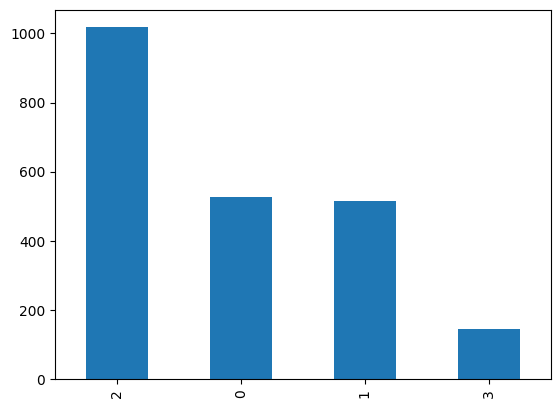

In [62]:
df['cluster_kmeans'].value_counts().plot.bar()

<Axes: xlabel='Age', ylabel='Density'>

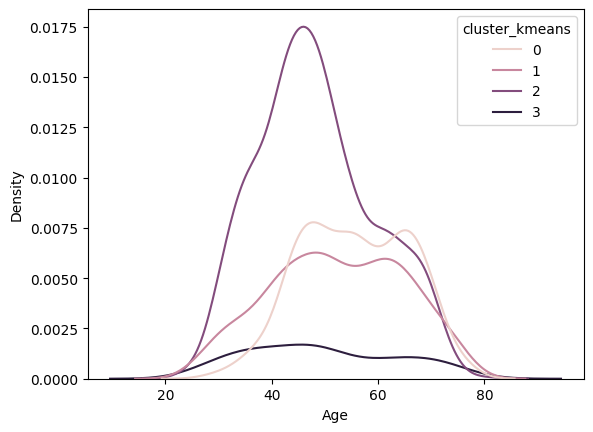

In [63]:
sns.kdeplot(df, x='Age', hue='cluster_kmeans')

<Axes: xlabel='MntTotal', ylabel='Income'>

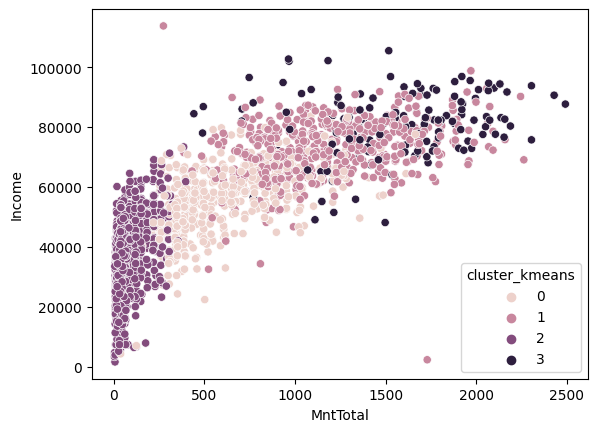

In [64]:
sns.scatterplot(df, y='Income', x='MntTotal', hue='cluster_kmeans')

<Axes: xlabel='cluster_kmeans', ylabel='count'>

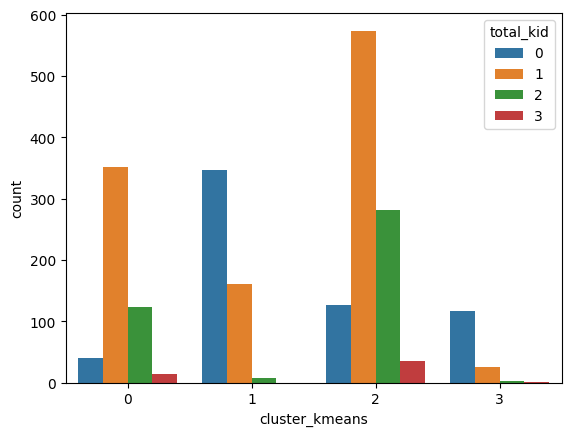

In [65]:
sns.countplot(data=df, x='cluster_kmeans', hue='total_kid')